In [1]:
#build setup
import numpy as np
from scipy.optimize import *
from scipy.integrate import *
import matplotlib.pyplot as plt
import math

## Problem Set 5 #3:
This problem examines the Collins toggle switch, modeled by the following coupled ODEs:

$$\frac{du}{dt}= \frac{\alpha}{1+v^n}-u \hspace{20mm}(1) $$

$$\frac{dv}{dt}= \frac{\alpha}{1+u^n}-v \hspace{20mm} (2) $$

### Part A.)
i.) In this system, both $u and v$ act as a repressor of gene expression.  This can be seen as they both occur solely in the denominator of the production term.  In this case, u represses v and v represses u.

ii.) 

iii.) n describes the cooperativity of the repressor as it is the exponent each repressor is raised to in the denominator of the production term.

iv.) The rate of degradation of each species is given in the degradation term, which appears as $-u$ and $-v$ respectively.  This means, the degradation occurs directly proportionally to the concentration of the species, with degradation constant $k_{deg}=1$.  


### Part B.)
To generate the nullclines, we set both derivatives in (1) and (2) equal to zero:

$$0= \frac{\alpha}{1+v^n}-u $$

$$0= \frac{\alpha}{1+u^n}-v $$


From here, we easily obtain tuples of values $(u,v)$ that satisfy these equations.  These are nullclines and plotted on the phase portrait below.

In [ ]:
# generate nullclines for part b
alpha=10; n1=1; n2=2; #constants

baseUvector=np.linspace(0,15,151)
baseVvector=np.linspace(0,15,151)

#v values corresponding to dvdt nullcline
vn1=alpha/(1+np.power(baseUvector,n1))

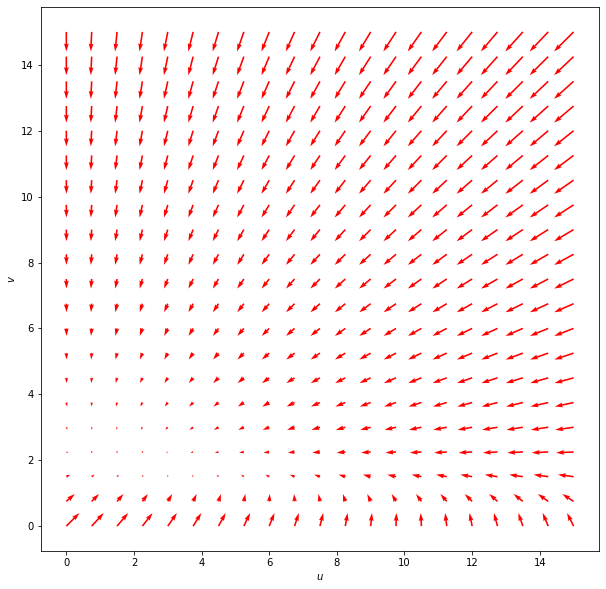

In [3]:
# problem 3


#vector field 3 sets up the differential equations for problem 3
def vectorfield3(w,t):
    """
    Defines the differential equations for coupled concentrations in Problem 3

    Arguments:
        w :  vector of the state variables:
                  w = [u,v]
        t :  time
                  
    """
    u, v = w
    alpha = 10; n=2;
    
    # Create f = (u', v')
    f = [ (alpha/(1+math.pow(v,n)))-u , (alpha/(1+math.pow(v,n)))-v ]
    return f

#generate nullclines for part b


n=21
uVector=np.linspace(0,15,n)
vVector=np.linspace(0,15,n)
t = np.linspace(0,20,201)

meshu,meshv=np.meshgrid(uVector,vVector)

dudt,dvdt=np.zeros(meshu.shape),np.zeros(meshv.shape)

for i in range(n):
    for j in range(n):
        localu=meshu[i,j]
        localv=meshv[i,j]
        deriv=vectorfield3([localu,localv],t)
        dudt[i,j]=deriv[0]
        dvdt[i,j]=deriv[1]

plt.rcParams["figure.figsize"] = (10,10)        
phasePortrait=plt.quiver(meshu,meshv,dudt,dvdt,color='r');

plt.xlabel('$u$');
plt.ylabel('$v$');
